# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

Veri Seti Bilgileri:
Türkiye'de yetiştirilen Keçimen ve Besni kuru üzüm çeşitlerinin görüntüleri elde edildi. Her iki çeşitten 450 adet olmak üzere toplam 900 adet kuru üzüm tanesi kullanıldı. Bu görüntüler çeşitli ön işleme aşamalarına tabi tutularak 7 morfolojik özellik çıkarılmıştır. Bu özellikler üç farklı yapay zeka tekniği kullanılarak sınıflandırılmıştır.

Özellik Bilgileri:

Alan: Kuru üzümün sınırları içindeki piksel sayısını verir.
Çevre: Kuru üzümün sınırları ile çevresindeki pikseller arasındaki mesafeyi hesaplayarak ortamı ölçer.
MajorAxisLength: Kuru üzüm üzerine çizilebilecek en uzun çizgi olan ana eksenin uzunluğunu verir.
MinorAxisLength: Kuru üzüm üzerine çizilebilecek en kısa çizgi olan küçük eksenin uzunluğunu verir.
Dışmerkezlik: Kuru üzümle aynı momentlere sahip olan elipsin dışmerkezliğinin bir ölçüsünü verir.
ConvexArea: Kuru üzümün oluşturduğu bölgenin en küçük dışbükey kabuğunun piksel sayısını verir.
Kapsam: Kuru üzümün oluşturduğu bölgenin sınırlayıcı kutudaki toplam piksel sayısına oranını verir.
Sınıfı: Keçimen ve Besni kuru üzümü.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import pickle


Cufflinks, Plotly kütüphanesini kullanarak Pandas DataFrame'leri üzerinde interaktif ve etkileşimli grafikler oluşturmayı sağlayan bir araçtır. 

In [2]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import cufflinks as cf; cf.go_offline()
import plotly.offline as py
from plotly.offline import plot, iplot
from plotly.offline import init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)

## Exploratory Data Analysis and Visualization

In [3]:
df=pd.read_excel("Raisin_Dataset.xlsx")
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [4]:
df.shape

(900, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.describe().T.style.background_gradient(cmap='PiYG', axis=1)

,count,mean,std,min,25%,50%,75%,max
Area,900.000000,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.000000,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.000000,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.000000,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.000000,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.000000,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.000000,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [7]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [8]:
df.describe(include='O').T

,count,unique,top,freq
Class,900,2,Kecimen,450


EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [9]:
df["Class"].value_counts(normalize=True).to_frame(name='percentage').reset_index()

,index,percentage
0,Kecimen,0.500
1,Besni,0.500


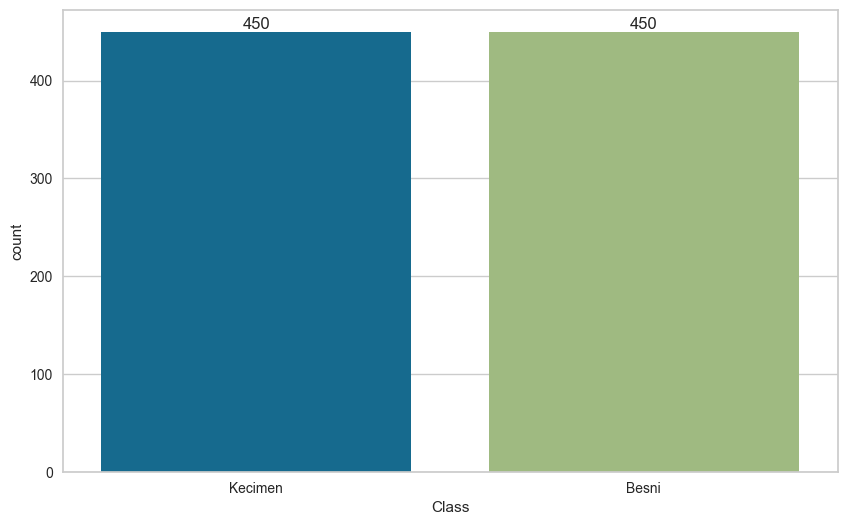

In [10]:
ax = sns.countplot(x='Class', data=df)
ax.bar_label(ax.containers[0]);

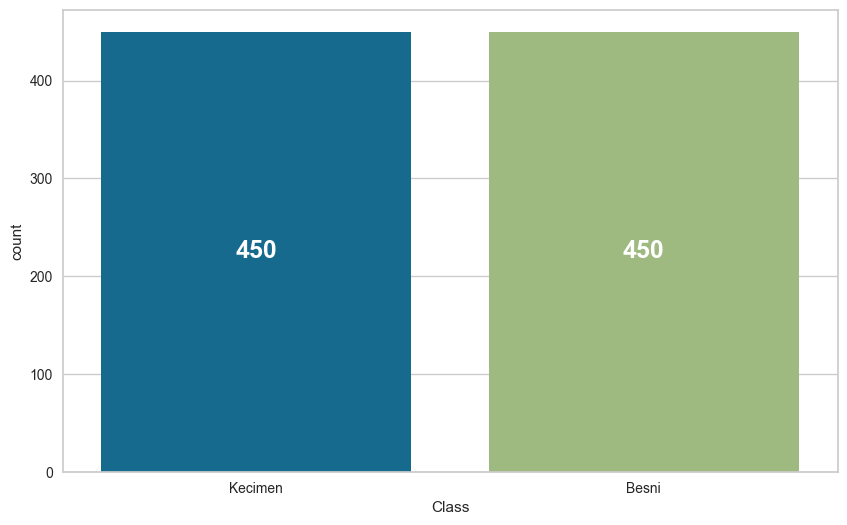

In [11]:
g=sns.countplot(data = df, x = "Class")
g.bar_label(g.containers[0], label_type='center', fontsize=18, color='w', weight='bold');

<AxesSubplot:title={'center':'Percentage of Class'}>

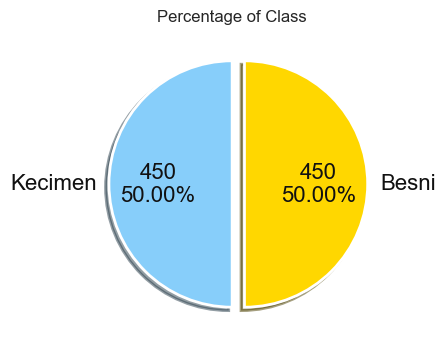

In [12]:
# burda pie chart ile görselleştirelim

df["Class"].value_counts(normalize=True).plot.pie(

    explode=[0, 0.1],
    shadow=True,
    colors=["LightSkyBlue",  "gold"],
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'white'},
    autopct=lambda x: '{:.0f}\n{:.2f}%'.format(len(df['Class'])*x/100, x), 

    startangle=90,
    title="Percentage of Class",
    ylabel= "",

    figsize=(4, 4),
)

In [13]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

Burası Öneml burda multicolinearity kontrolü yapacagız ve multi olan feature larımızı görecegiz

In [14]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (5, 5)


,Area,MajorAxisLength,MinorAxisLength,ConvexArea,Perimeter
Area,nan,0.932774,0.906650,0.995920,0.961352
MajorAxisLength,0.932774,nan,nan,0.945031,0.977978
MinorAxisLength,0.906650,nan,nan,nan,nan
ConvexArea,0.995920,0.945031,nan,nan,0.976612
Perimeter,0.961352,0.977978,nan,0.976612,nan


<AxesSubplot:>

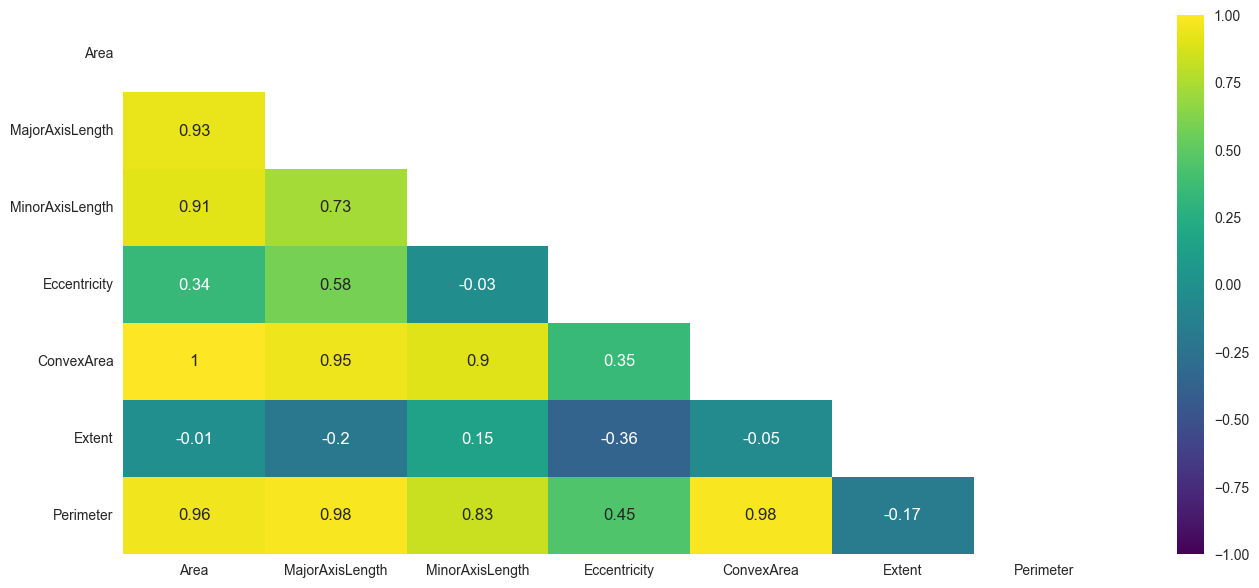

In [15]:
plt.figure(figsize=(16,7))
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, 
    cmap='viridis'
)

In [16]:
fig = px.imshow(
    df.corr().round(2), 
    text_auto=True, zmin=-1, zmax=1,
    color_continuous_scale='viridis',
    aspect="auto",
)
fig.show()

In [24]:
df.iloc[:,:-1].iplot(
    kind="box",
    theme = 'polar',
    dimensions =(800,400),
    title= '', 
    xTitle = '', 
    yTitle= '',  
)

Grafik, iplot() metodu ile interaktif bir biçimde çizilir. kind="box" parametresi ile kutu grafiği türü belirtilirken, theme="polar" ile grafik teması polar olarak ayarlanır. Grafik boyutları dimensions parametresi ile belirlenirken, title, xTitle ve yTitle gibi parametrelerle başlık ve eksen isimleri belirlenebilir.

Sonuç olarak, her bir sayısal sütuna ait kutu grafiği, bu sütunun veri dağılımını, çeyrekliklerini, outlier'larını ve merkezi eğilim ölçülerini gösteren interaktif bir grafik elde edilir.

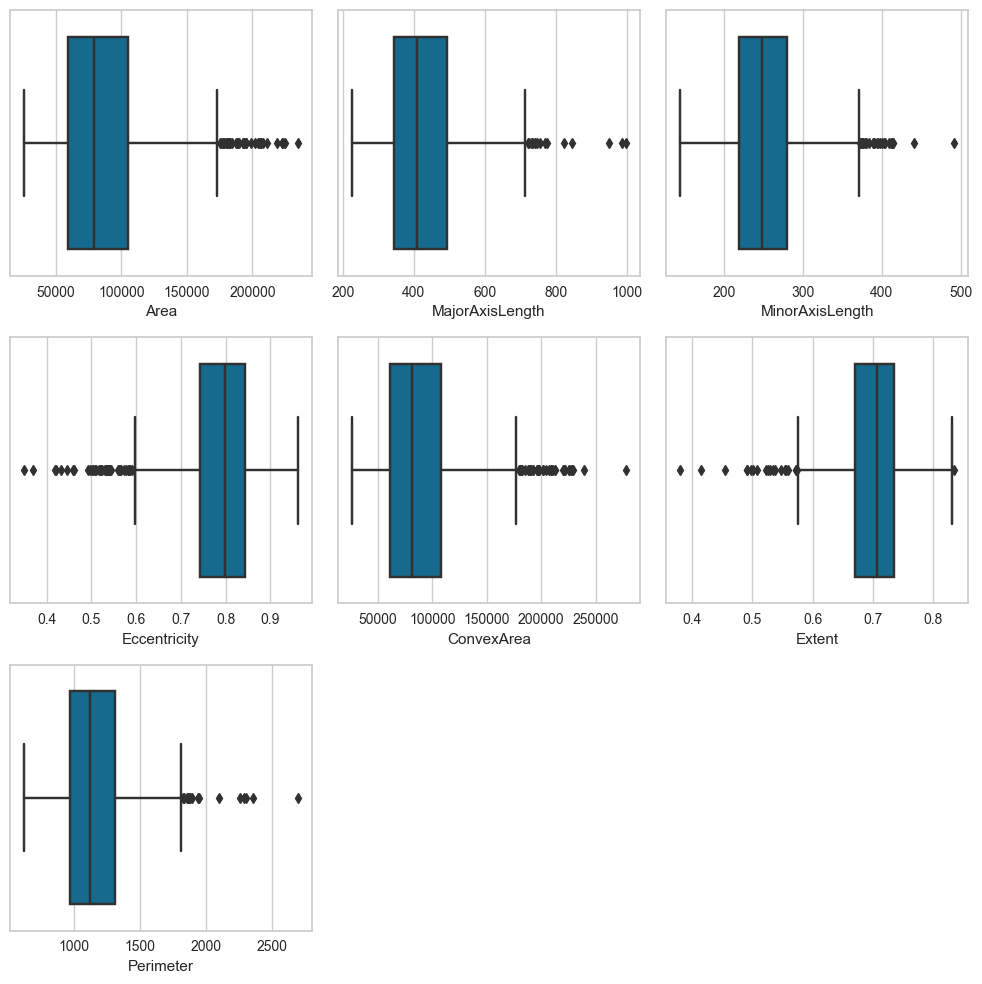

In [18]:
fig = plt.figure(figsize = (10, 10))

for i , col in enumerate(df.select_dtypes(["float", "int"]).columns):
    plt.subplot(3, 3, i+1)
    ax = sns.boxplot(x = df[col])

plt.tight_layout()

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature, data=df)

In [ ]:
sns.pairplot(df, hue='Class', corner=True);

In [19]:
#Tranform object dtype with numeric  
df['Class'] = df['Class'].replace(('Kecimen', 'Besni'), (0,1))
df['Class'].unique()

array([0, 1], dtype=int64)

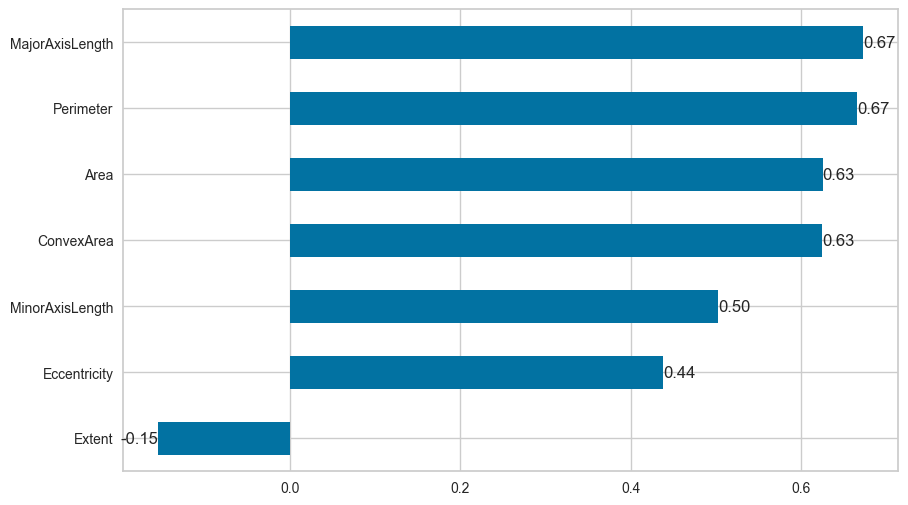

In [20]:
ax = df.corr()["Class"].drop("Class").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

In [21]:
df.corr()['Class'].sort_values(key=abs, ascending=False)

Class              1.000
MajorAxisLength    0.673
Perimeter          0.666
Area               0.626
ConvexArea         0.626
MinorAxisLength    0.503
Eccentricity       0.438
Extent            -0.155
Name: Class, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [23]:
len(df[df.duplicated()])

0

## Train | Test Split and Scaling

In [40]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# SCALING

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#scaler.fit(X_train) burayı çalıştırmadık

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [45]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
739,83929,429.090,252.038,0.809,87269,0.705,1176.227,1,1,0.613
123,55787,333.703,226.951,0.733,59520,0.689,977.425,0,0,0.135
885,54502,346.458,204.081,0.808,56464,0.636,927.283,1,0,0.152
875,88338,504.482,227.128,0.893,90790,0.727,1230.493,1,1,0.845
617,130388,511.898,326.312,0.770,132727,0.719,1393.974,1,1,0.926
798,71054,364.751,249.723,0.729,72956,0.728,1027.206,1,0,0.205
749,96753,477.500,261.943,0.836,99964,0.694,1258.683,1,1,0.821
804,223075,694.248,411.810,0.805,225916,0.765,1812.569,1,1,0.999
682,106923,591.116,234.823,0.918,111428,0.522,1425.109,1,1,0.986
347,61967,364.784,218.566,0.801,63724,0.687,981.059,0,0,0.206


In [46]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



In [47]:
log_model = LogisticRegression(max_iter=100000)
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
solver = ["liblinear"]


param_grid = {"penalty" : penalty,
             "C" : C,
             "solver" : solver}
grid_model = GridSearchCV(log_model, param_grid = param_grid, scoring = "precision", cv=10)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='precision')

In [48]:
eval_metric(grid_model,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[311  41]
 [ 66 302]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       352
           1       0.88      0.82      0.85       368

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720


Test_Set
[[93  5]
 [12 70]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.93      0.85      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



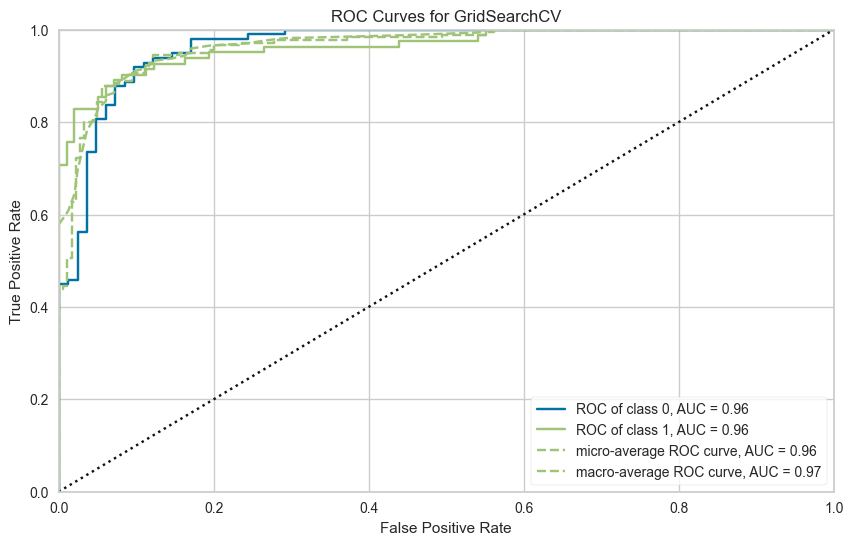

In [52]:
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

In [53]:
y_pred_proba = model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

NameError: name 'roc_auc_score' is not defined

In [27]:
log_model = LogisticRegression()

In [28]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [29]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[7.56122893e-01, 2.43877107e-01],
       [2.61795091e-01, 7.38204909e-01],
       [2.26244543e-03, 9.97737555e-01],
       [2.16597596e-01, 7.83402404e-01],
       [1.12689412e-01, 8.87310588e-01],
       [9.04391084e-01, 9.56089163e-02],
       [1.09120207e-01, 8.90879793e-01],
       [8.26101574e-01, 1.73898426e-01],
       [3.84534970e-01, 6.15465030e-01],
       [4.82207634e-01, 5.17792366e-01],
       [2.87290994e-02, 9.71270901e-01],
       [4.84506550e-01, 5.15493450e-01],
       [2.77065637e-01, 7.22934363e-01],
       [3.60414853e-01, 6.39585147e-01],
       [9.15518855e-01, 8.44811454e-02],
       [7.42907071e-01, 2.57092929e-01],
       [9.71652952e-01, 2.83470479e-02],
       [9.60712562e-01, 3.92874383e-02],
       [7.94889623e-01, 2.05110377e-01],
       [6.24550525e-01, 3.75449475e-01],
       [9.35589120e-01, 6.44108803e-02],
       [5.44575898e-02, 9.45542410e-01],
       [8.64789816e-04, 9.99135210e-01],
       [6.05817770e-07, 9.99999394e-01],
       [8.854441

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
532,82161,441.796,246.810,0.829,86909,0.630,1222.158,1,1,0.738
693,49371,320.643,200.246,0.781,52692,0.675,921.059,1,0,0.113
230,54219,344.291,204.497,0.804,56526,0.688,931.430,0,0,0.141
109,65396,331.538,253.243,0.645,66783,0.765,975.425,0,0,0.096
682,106923,591.116,234.823,0.918,111428,0.522,1425.109,1,1,0.986
36,55827,305.299,234.661,0.640,57724,0.703,926.095,0,0,0.068
299,36113,257.642,181.157,0.711,37442,0.694,737.637,0,0,0.020
201,61996,333.748,243.540,0.684,63641,0.673,958.627,0,0,0.109
800,137921,598.761,297.202,0.868,142159,0.749,1510.852,1,1,0.988
804,223075,694.248,411.810,0.805,225916,0.765,1812.569,1,1,0.999


## Model Performance

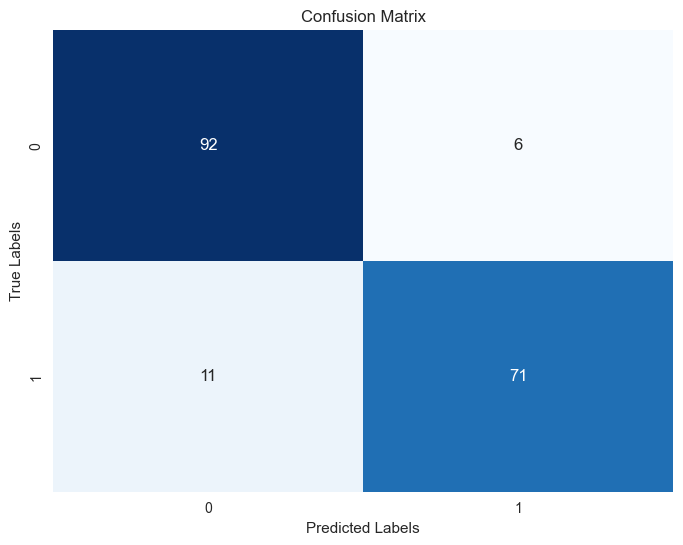

In [31]:
# Confusion matrisini hesapla
y_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [33]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
print(vif_data)

           feature      VIF
0             Area 2276.502
1  MajorAxisLength 1894.686
2  MinorAxisLength  778.343
3     Eccentricity  256.075
4       ConvexArea 2678.790
5           Extent  194.790
6        Perimeter 3518.698


VIF puanının yüksek çoklu bağlantı sorununa sahip olduğumuzu gösterdiğini görüyoruz.

### Cross Validate

In [35]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.858
test_precision_weighted   0.861
test_recall_weighted      0.858
test_f1_weighted          0.858
dtype: float64

In [36]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [37]:
# Derste yaptıgımız gibi şimdide class 0 için score alıyoruz
f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [38]:
model = LogisticRegression() # model sıfırlanır

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.004,0.002,0.725,0.829,0.773
2,0.006,0.002,0.865,0.914,0.889
3,0.004,0.002,0.806,0.829,0.817
4,0.004,0.003,0.909,0.857,0.882
5,0.006,0.003,0.825,0.943,0.880
6,0.005,0.002,0.857,0.857,0.857
7,0.004,0.002,0.865,0.914,0.889
8,0.004,0.002,0.879,0.829,0.853
9,0.004,0.002,0.846,0.917,0.880
10,0.004,0.002,0.842,0.889,0.865


In [39]:
df_scores.mean()[2:]

test_precision_0   0.842
test_recall_0      0.878
test_f1_0          0.859
dtype: float64

### GridSearchCV

In [45]:
log_model = LogisticRegression(solver='liblinear', penalty='l1')

In [46]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) ## Alpha nın tersi şeklinde çalışıyor

param_grid = {"penalty" : penalty,
             "C" : C}

In [47]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [48]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [49]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l2'}

In [50]:
grid_model.best_score_

0.861111111111111

In [51]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [55]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[310  42]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



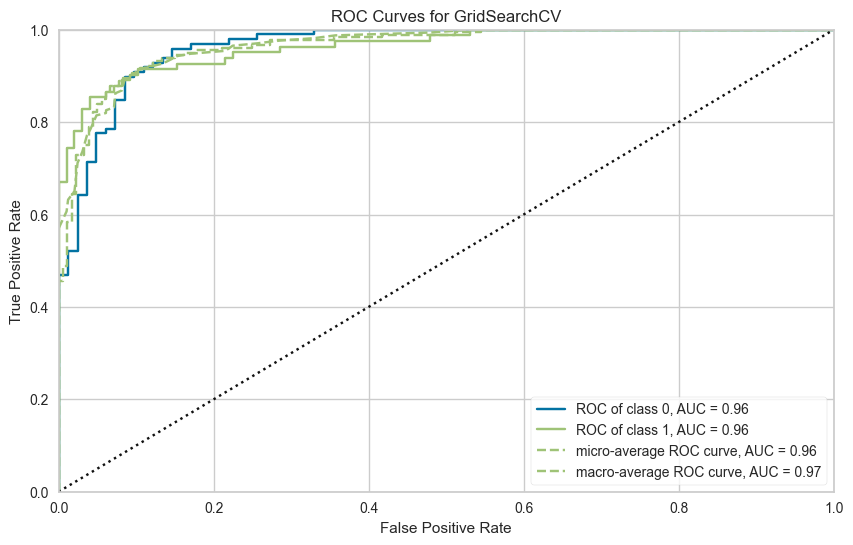

In [56]:
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

In [55]:
y_pred_proba = model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9642857142857143

# Finding Best Threshold for Accuracy (Youden Index)

In [56]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.48234026134938096

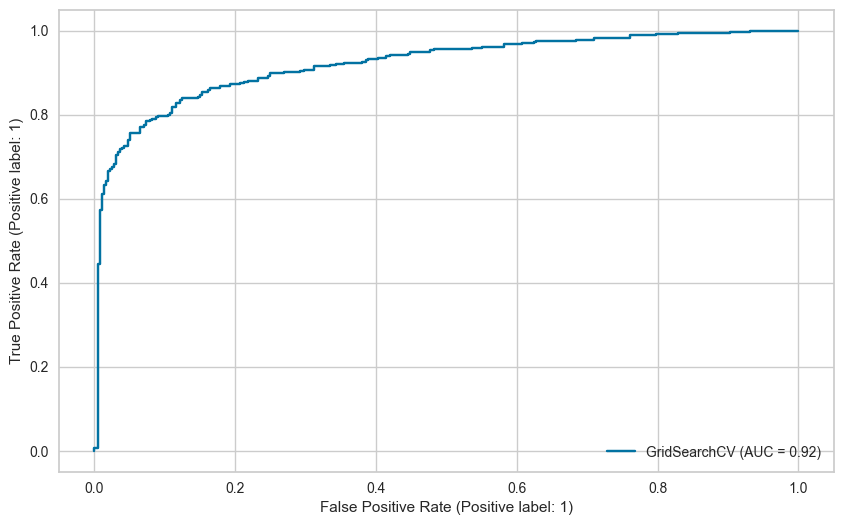

In [57]:
plot_roc_curve(grid_model, X_train_scaled, y_train);  
plt.show()

In [58]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9198755558300394

In [59]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [60]:
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,0.000,0.000,0.000,0.006,0.006,0.009,0.009,0.011,0.011,0.014,...,0.761,0.798,0.798,0.830,0.830,0.903,0.903,0.932,0.932,1.000
1,0.000,0.003,0.005,0.005,0.446,0.446,0.573,0.573,0.611,0.611,...,0.989,0.989,0.992,0.992,0.995,0.995,0.997,0.997,1.000,1.000
2,2.000,1.000,1.000,1.000,0.864,0.855,0.779,0.776,0.749,0.746,...,0.083,0.072,0.070,0.062,0.061,0.035,0.035,0.032,0.032,0.008


In [61]:
optimal_idx = np.argmax(tp_rate - fp_rate)# maximum değer index nosu Bu ifade, duyarlılık (true positive rate) ve yanlış alarm oranı (false positive rate) arasındaki farkın maksimum olduğu noktayı bulur.
optimal_threshold = thresholds[optimal_idx] # bulduğumuz index nomarasının treshold değerini verir. en iyi değer default 0.5 değil treshold 0.3393 değeridir.  
optimal_threshold

0.48234026134938096

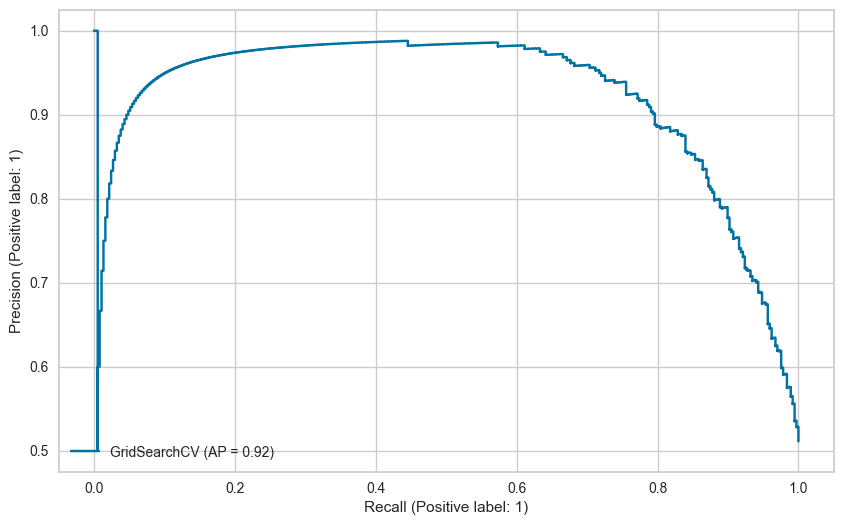

In [62]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);
plt.show()

In [63]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.919576644477466

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [65]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.48234026134938096

np.argmax(tp_rate - fp_rate) == np.argmax((2 * precisions * recalls) / (precisions + recalls)) aslında burda yukarda yaptıgımız işlemi formuluze ettik

ROC ile Presicion Recall Curve tresh old seviyeleri ilgili formülleri ile yapıldığında aynı sonucu verir. Bu sebeple hangisinde yaptığınızın bir önemi yoktur.

In [66]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.24573156, 0.69403053, 0.99001822, 0.72366768, 0.81960692,
       0.11100181, 0.83268658, 0.19708422, 0.57445414, 0.50284264,
       0.94028864, 0.49709021, 0.64354329, 0.59761923, 0.09909129,
       0.2828011 , 0.03513106, 0.05162636, 0.21268413, 0.33128644,
       0.07403257, 0.91327666, 0.99544449, 0.99997791, 0.13546385,
       0.71305687, 0.63836774, 0.97550821, 0.13145668, 0.03698474,
       0.0586041 , 0.95428985, 0.90532642, 0.10829234, 0.08598346,
       0.97322847, 0.0238611 , 0.7131237 , 0.32287597, 0.16244812,
       0.2215996 , 0.76157321, 0.56907652, 0.34023489, 0.9747265 ,
       0.94701105, 0.77590737, 0.99636974, 0.9668088 , 0.15431923,
       0.99246514, 0.67194817, 0.58696376, 0.7177211 , 0.28182173,
       0.13825332, 0.15106649, 0.30291882, 0.72749612, 0.900292  ,
       0.02477716, 0.70942671, 0.2594941 , 0.08061424, 0.69436402,
       0.18361362, 0.9392786 , 0.07741327, 0.61587193, 0.99995454,
       0.17015979, 0.15997979, 0.12089346, 0.32301448, 0.57899

Optimum tresholda göre yeni bir tahmin oluşturdum. y_pred2

In [67]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [68]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[92  6]
 [12 70]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        98
           1       0.92      0.85      0.89        82

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



In [69]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[308  44]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



# Conclusion 

In [87]:
scaler = StandardScaler().fit(X)

In [88]:
pickle.dump(scaler, open("scaler_raisin", 'wb'))

In [89]:
X_scaled_raisin = scaler.transform(X)

In [90]:
final_model = LogisticRegression().fit(X_scaled_raisin, y)

In [91]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))

In [92]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


# CONGRATULATIONS

# KNN

yUKARDAKİ VERİ SETİNE SADIK KALARAK BU SEFERDE KNN İÇİN MODELİMİZİ EGİTECEGİZ

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn_model = KNeighborsClassifier()

In [109]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [110]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [111]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6,

# Model Performance on Classification Tasks

In [112]:
eval_metric(knn_model,X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[90  8]
 [16 66]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        98
           1       0.89      0.80      0.85        82

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[323  29]
 [ 54 314]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       352
           1       0.92      0.85      0.88       368

    accuracy                           0.88       720
   macro avg       0.89      0.89      0.88       720
weighted avg       0.89      0.88      0.88       720



# Elbow Method for Choosing Reasonable K Values

In [113]:

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [114]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

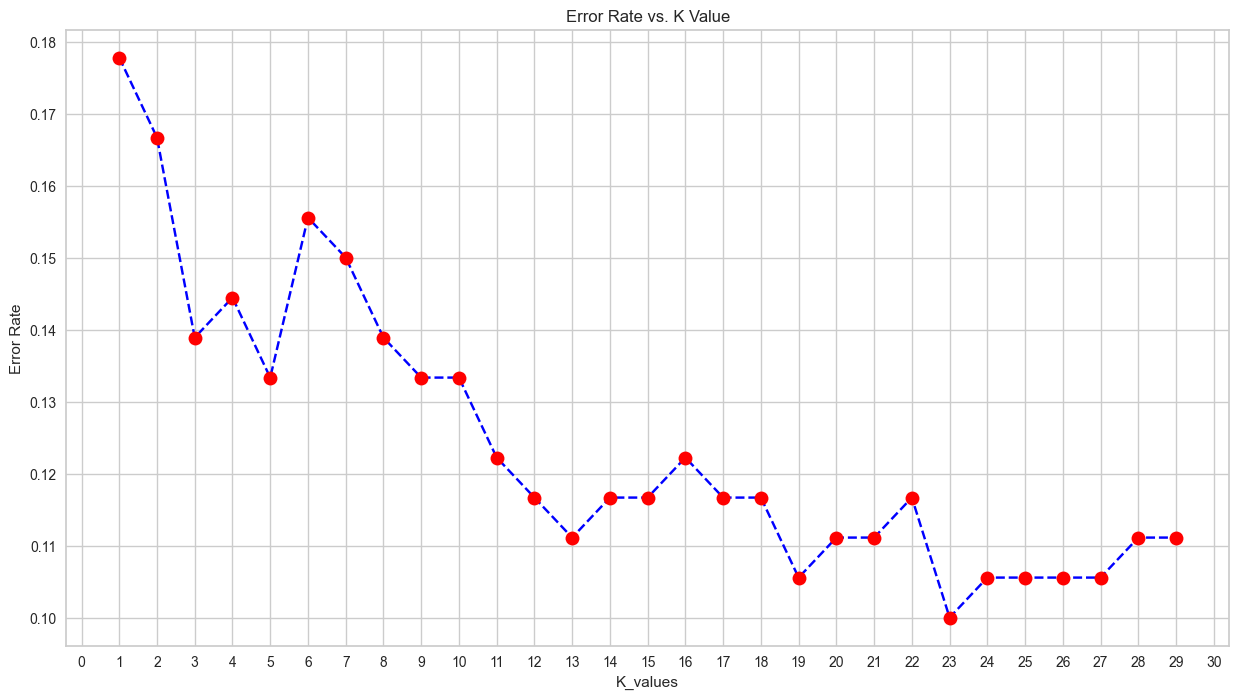

In [115]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

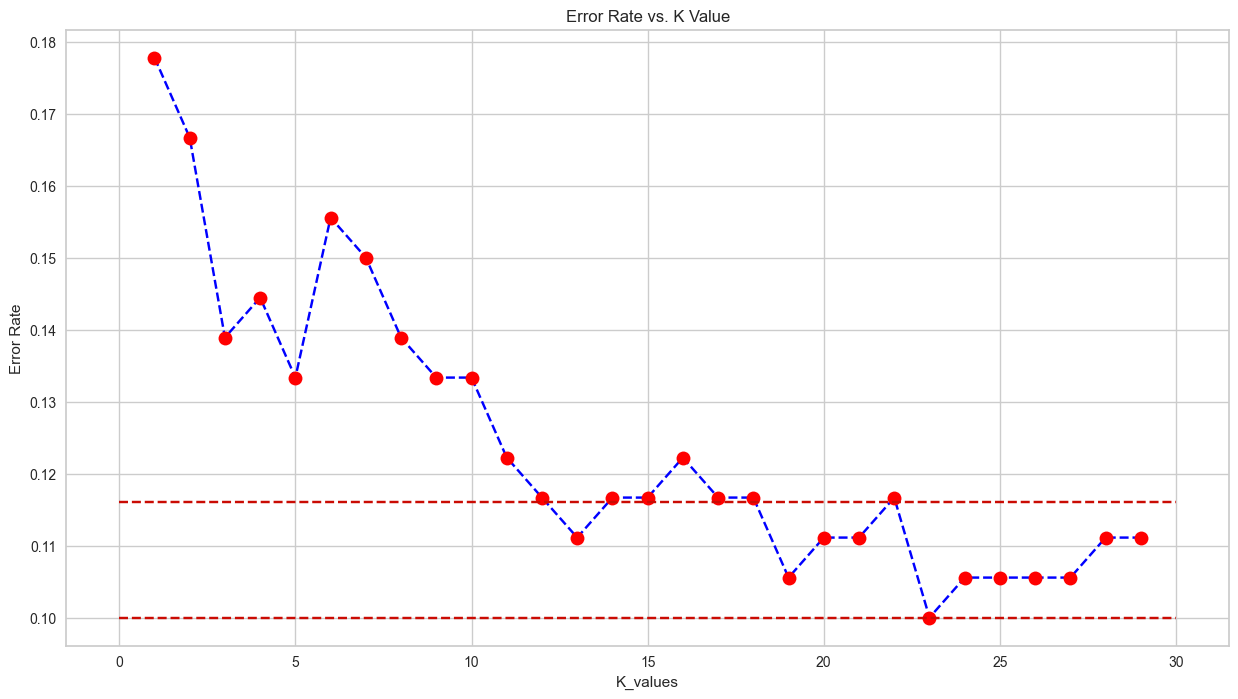

In [116]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.1, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.116, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

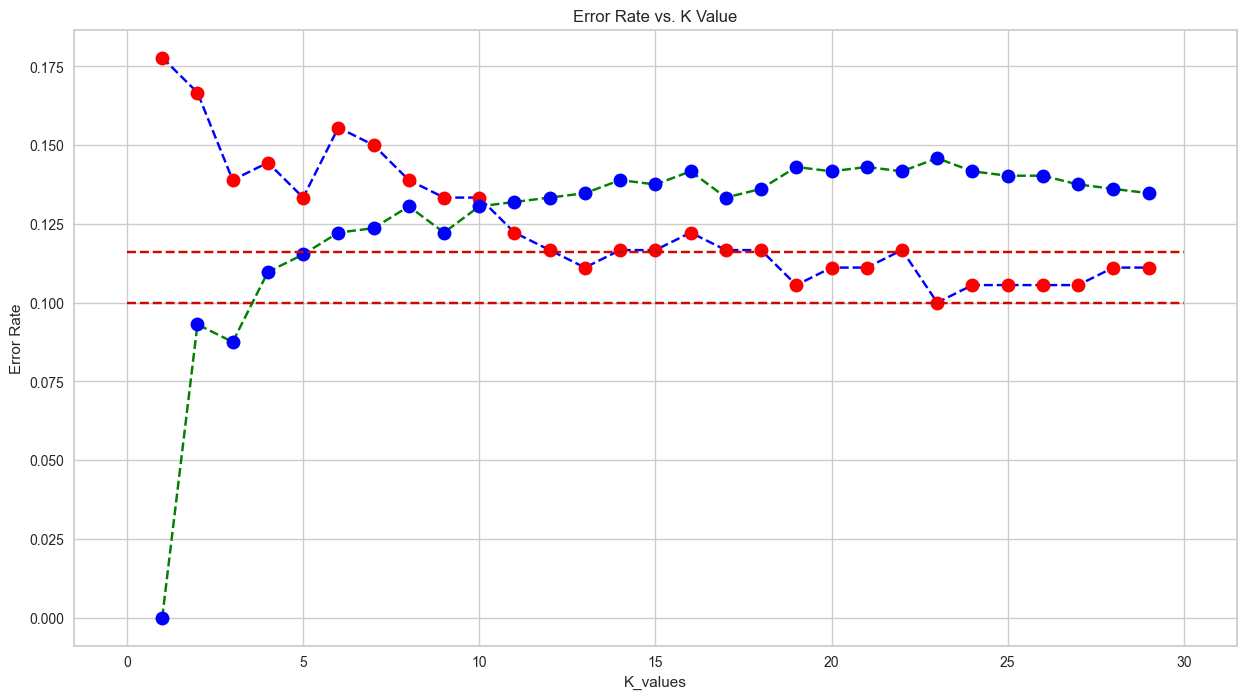

In [117]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.1, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.116, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

# Scores by Various K Values

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set
[[90  8]
 [16 66]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        98
           1       0.89      0.80      0.85        82

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[323  29]
 [ 54 314]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       352
           1       0.92      0.85      0.88       368

    accuracy                           0.88       720
   macro avg       0.89      0.89      0.88       720
weighted avg       0.89      0.88      0.88       720



In [119]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=6

Test_Set
[[90  8]
 [20 62]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        98
           1       0.89      0.76      0.82        82

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180


Train_Set
[[330  22]
 [ 66 302]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       352
           1       0.93      0.82      0.87       368

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



In [120]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set
[[91  7]
 [17 65]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        98
           1       0.90      0.79      0.84        82

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[322  30]
 [ 58 310]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       352
           1       0.91      0.84      0.88       368

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



In [121]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled,y_train)
print('WITH K=17\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=17

Test_Set
[[94  4]
 [17 65]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        98
           1       0.94      0.79      0.86        82

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180


Train_Set
[[317  35]
 [ 61 307]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       352
           1       0.90      0.83      0.86       368

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



# Cross Validate For Optimal K Value

In [122]:
model = KNeighborsClassifier(n_neighbors=17)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.853
test_precision_weighted   0.856
test_recall_weighted      0.853
test_f1_weighted          0.853
dtype: float64

# Gridsearch Method for Choosing Reasonable K Values

In [123]:
knn_grid = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [124]:
knn_grid_model.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

In [125]:
print('WITH K=28\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=28

Test_Set
[[90  8]
 [19 63]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        98
           1       0.89      0.77      0.82        82

    accuracy                           0.85       180
   macro avg       0.86      0.84      0.85       180
weighted avg       0.85      0.85      0.85       180


Train_Set
[[320  32]
 [ 57 311]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       352
           1       0.91      0.85      0.87       368

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



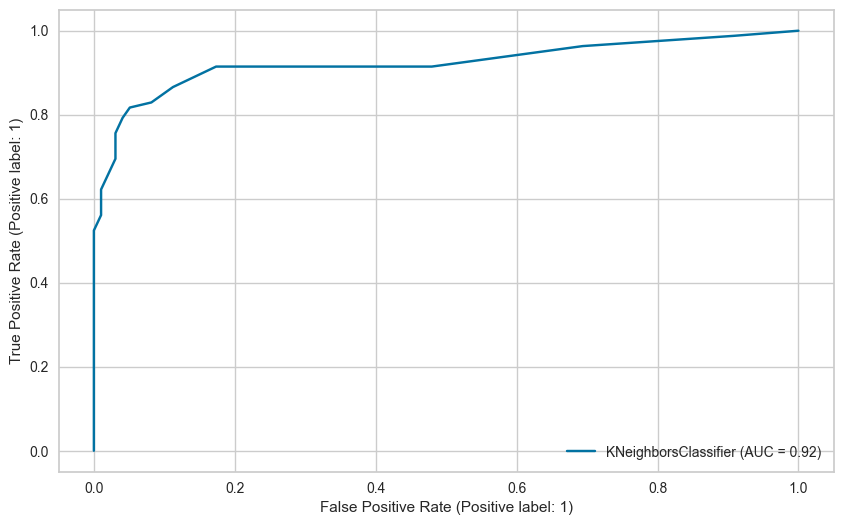

In [127]:
from sklearn.metrics import RocCurveDisplay
knn_model = KNeighborsClassifier(n_neighbors=17).fit(X_train_scaled, y_train)
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.show()

In [128]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9222872075659532